Menggunakan dataset Bike Sharing Datase

=========================================
Dataset characteristics
=========================================	
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

**Mendefinisikan Pertanyaan**

1. Berapa banyak pengguna (dibedakan menjadi registered atau casual) setiap pekan?
2. Pada musim kapan biasanya pengguna meminjam sepeda?
3. Pada waktu kapan biasanya pengguna meminjam sepeda?
4. Pada cuaca yang bagaimana biasanya pengguna meminjam sepeda?

**[Data Wrangling]**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Gathering data**

Di sini kita akan membaca data yang kita peroleh dari direktori /data

In [4]:
# Membuat tabel day
days_df = pd.read_csv("data/day.csv")
days_df.head(-1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


In [5]:
# Membuat tabel hour
hours_df = pd.read_csv("data/hour.csv")
hours_df.head(-1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,17374,2012-12-31,1,1,12,18,0,1,1,2,0.26,0.2727,0.48,0.1343,10,112,122
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


**Assessing Data**

Selanjutnya kita akan menilai data yang telah diperoleh apakah layak untuk digunakan

In [6]:
# Menilai data days_df
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tidak ada keanehan dalam data days_df, kecuali kolom dteday.

Kolom dteday adalah kolom untuk menyimpan tanggal. Akan tetapi bertipe data object, seharusnya  bertipe data datetime.

Dengan demikian, nantinya kita akan mengonversinya menjadi tipe data datetime.

In [7]:
print("Jumlah duplikasi: ", days_df.duplicated().sum())
days_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
# Menilai data hours_df
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tidak ada keanehan dalam data hours_df, kecuali kolom dteday.

Kolom dteday adalah kolom untuk menyimpan tanggal. Akan tetapi bertipe data object, seharusnya bertipe data datetime.

Dengan demikian, nantinya kita akan mengonversinya menjadi tipe data datetime.

In [9]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())
hours_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Cleaning Data**

Berdasarkan hasil identifikasi dari proses sebelumnya, kita akan menyelesaikannya dalam proses ini.
Hanya terdapat dua kolom yang bermasalah dengan permasalahan yang sama, yaitu tipe data. 

In [10]:
# Membersihkan data days_df
days_df["dteday"] = pd.to_datetime(days_df["dteday"])

In [11]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
# Membersihkan data hours_df
hours_df["dteday"] = pd.to_datetime(hours_df["dteday"])

In [13]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Data telah siap untuk digunakan!

selanjutnya kita akan mencoba untuk menjawab pertanyaan di awal, yaitu:

1. Berapa banyak pengguna (dibedakan menjadi registered atau casual) setiap pekan?
2. Pada musim kapan biasanya pengguna meminjam sepeda?
3. Pada waktu kapan biasanya pengguna meminjam sepeda?
4. Pada cuaca yang bagaimana biasanya pengguna meminjam sepeda?
5. Kapan 5 tanggal terakhir dengan total pengguna mencapai lebih dari 5000 dalam sehari?
6. Seberapa sering hari tertentu dapat mencapai lebih dari 5000 pengguna dalam sehari?
7. Berapa total pengguna pada hari tertentu?

**[Exploratory Data]**

1. Berapa banyak pengguna (dibedakan menjadi registered atau casual) setiap pekan?

In [14]:
# Membuat kolom mingguan
days_df['dteweek'] = pd.to_datetime(days_df['dteday']) - pd.to_timedelta(7, unit='d')
weekly_df = days_df.groupby(pd.Grouper(key='dteweek', freq='W-MON')).agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

weekly_df

,casual,registered,cnt
dteweek,,,
2010-12-27,582,2553,3135
2011-01-03,589,8791,9380
2011-01-10,750,7954,8704
2011-01-17,574,8612,9186
2011-01-24,578,7206,7784
...,...,...,...
2012-11-26,3324,32960,36284
2012-12-03,3494,33204,36698
2012-12-10,2963,32418,35381


In [15]:
weekly_df.describe()

,casual,registered,cnt
count,105.00000,105.000000,105.000000
mean,5904.92381,25453.923810,31358.847619
std,3303.55937,9668.191685,12456.093506
min,574.00000,2553.000000,3135.000000
25%,2878.00000,19890.000000,22614.000000
50%,5996.00000,24452.000000,31291.000000
75%,8795.00000,32960.000000,42592.000000
max,12756.00000,43506.000000,54366.000000


Dapat kita lihat, biasanya terdapat sekitar 31,359 pengguna setiap pekannya dengan pengguna tipe casual sebanyak 5,904 orang
dan pengguna tipe registered sebanyak 4x banyaknya pengguna tipe casual, tepatnya 25,453 orang.

2. Pada musim kapan biasanya pengguna meminjam sepeda?

In [16]:
# Membuat kolom musiman
seasonal_df = days_df.groupby(by="season").agg({
    'casual' : ['sum', 'mean'],
    'registered' : ['sum', 'mean'],
    'cnt' : ['sum', 'mean']
})

# Menginterpretasikan indeks
seasonal_df.index = seasonal_df.index.to_series().map({1:'springer', 2:'summer', 3:'fall', 4:'winter'})
seasonal_df

casual              registered                   cnt             
             sum         mean        sum         mean      sum         mean
season                                                                     
springer   60622   334.928177     410726  2269.204420   471348  2604.132597
summer    203522  1106.097826     715067  3886.233696   918589  4992.331522
fall      226091  1202.611702     835038  4441.691489  1061129  5644.303191
winter    129782   729.112360     711831  3999.050562   841613  4728.162921

In [17]:
# Mengecek total pengguna yang terbanyak

count_user, which_season = max([(int(count_user), season) for season, count_user in seasonal_df['cnt']['sum'].items()]) # berdasarkan jumlah
print(f"Total pengguna terbanyak adalah pada musim {which_season}, sebanyak {count_user:,} orang secara keseluruhan\n")

count_user, which_season = max([(int(count_user), season) for season, count_user in seasonal_df['cnt']['mean'].items()]) # berdasarkan rata-rata
print(f"Dan rata-rata pengguna terbanyak adalah pada musim {which_season}, sebanyak {count_user:,} orang dalam satu musim\n")

# Mengecek total pengguna yang paling sedikit
count_user, which_season = min([(int(count_user), season) for season, count_user in seasonal_df['cnt']['sum'].items()]) # berdasarkan jumlah
print(f"Sedangkan, total pengguna paling sedikit adalah pada musim {which_season}, sebanyak {count_user:,} orang secara keseluruhan\n")

count_user, which_season = min([(int(count_user), season) for season, count_user in seasonal_df['cnt']['mean'].items()]) # berdasarkan rata-rata
print(f"Dan rata-rata pengguna paling sedikit adalah pada musim {which_season}, sebanyak {count_user:,} orang dalam satu musim\n")

Total pengguna terbanyak adalah pada musim fall, sebanyak 1,061,129 orang secara keseluruhan

Dan rata-rata pengguna terbanyak adalah pada musim fall, sebanyak 5,644 orang dalam satu musim

Sedangkan, total pengguna paling sedikit adalah pada musim springer, sebanyak 471,348 orang secara keseluruhan

Dan rata-rata pengguna paling sedikit adalah pada musim springer, sebanyak 2,604 orang dalam satu musim



3. Pada waktu kapan biasanya pengguna meminjam sepeda?

In [18]:
# Membuat kolom per jam
hourly_df = hours_df.groupby(by="hr").agg({
    'casual' : ['sum', 'mean'],
    'registered' : ['sum', 'mean'],
    'cnt' : ['sum', 'mean']
})
hourly_df

casual            registered                 cnt            
      sum       mean        sum        mean     sum        mean
hr                                                             
0    7375  10.158402      31755   43.739669   39130   53.898072
1    4709   6.504144      19455   26.871547   24164   33.375691
2    3412   4.772028      12940   18.097902   16352   22.869930
3    1893   2.715925       6281    9.011478    8174   11.727403
4     874   1.253945       3554    5.098996    4428    6.352941
5    1012   1.411437      13249   18.478382   14261   19.889819
6    3017   4.161379      52115   71.882759   55132   76.044138
7    8037  11.055021     146134  201.009629  154171  212.064649
8   15761  21.679505     245240  337.331499  261001  359.011004
9   22458  30.891334     136980  188.418157  159438  219.309491
10  33789  46.477304      92468  127.191197  126257  173.668501
11  43286  59.540578     108034  148.602476  151320  208.143054
12  49718  68.293956     134696  185.021978  184414  253.315934
13  52713  72.308642     132206  181.352538  184919  253.661180
14  55089  75.567901     120563  165.381344  175652  240.949246
15  54606  74.905350     128543  176.327846  183149  251.233196
16  53834  73.745205     173914  238.238356  227748  311.983562
17  54220  74.273973     282640  387.178082  336860  461.452055
18  44496  61.120879     265276  364.390110  309772  425.510989
19  35505  48.770604     191284  262.752747  226789  311.523352
20  26378  36.233516     138172  189.796703  164550  226.030220
21  20570  28.255495     104875  144.059066  125445  172.314560
22  16200  22.252747      79412  109.082418   95612  131.335165
23  11065  15.199176      52876   72.631868   63941   87.831044

In [19]:
# Mengecek total pengguna yang terbanyak

count_user, which_hour = max([(int(count_user), hour) for hour, count_user in hourly_df['cnt']['sum'].items()]) # berdasarkan jumlah
print(f"Total pengguna terbanyak adalah pada pukul {which_hour}, sebanyak {count_user:,} orang secara keseluruhan\n")

count_user, which_hour = max([(int(count_user), hour) for hour, count_user in hourly_df['cnt']['mean'].items()]) # berdasarkan rata-rata
print(f"Dan, rata-rata pengguna terbanyak adalah pada pukul {which_hour}, sebanyak {count_user:,} orang dalam satu hari\n")

# Mengecek total pengguna yang paling sedikit
count_user, which_hour = min([(int(count_user), hour) for hour, count_user in hourly_df['cnt']['sum'].items()]) # berdasarkan jumlah
print(f"Sedangkan, total pengguna paling sedikit adalah pada pukul {which_hour}, sebanyak {count_user:,} orang secara keseluruhan\n")

count_user, which_hour = min([(int(count_user), hour) for hour, count_user in hourly_df['cnt']['mean'].items()]) # berdasarkan rata-rata
print(f"Dan, rata-rata pengguna paling sedikit adalah pada pukul {which_hour}, sebanyak {count_user:,} orang dalam satu hari\n")

Total pengguna terbanyak adalah pada pukul 17, sebanyak 336,860 orang secara keseluruhan

Dan, rata-rata pengguna terbanyak adalah pada pukul 17, sebanyak 461 orang dalam satu hari

Sedangkan, total pengguna paling sedikit adalah pada pukul 4, sebanyak 4,428 orang secara keseluruhan

Dan, rata-rata pengguna paling sedikit adalah pada pukul 4, sebanyak 6 orang dalam satu hari



4. Pada cuaca yang bagaimana biasanya pengguna meminjam sepeda?

In [20]:
# Membuat kolom per cuaca
weather_df = hours_df.groupby(by="weathersit").agg({
    'casual' : ['sum', 'mean'],
    'registered' : ['sum', 'mean'],
    'cnt' : ['sum', 'mean']
})
# menginterpretasikan index
weather_df.index = weather_df.index.to_series().map({
        1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
		2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
		3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
		4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
})
weather_df

casual              
                                                       sum       mean   
weathersit                                                              
Clear, Few clouds, Partly cloudy, Partly cloudy     462745  40.545431  \
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  134481  29.595290   
Light Snow, Light Rain + Thunderstorm + Scatter...   22783  16.055673   
Heavy Rain + Ice Pallets + Thunderstorm + Mist,...       8   2.666667   

                                                   registered               
                                                          sum        mean   
weathersit                                                                  
Clear, Few clouds, Partly cloudy, Partly cloudy       1875428  164.323841  \
Mist + Cloudy, Mist + Broken clouds, Mist + Few...     661471  145.570202   
Light Snow, Light Rain + Thunderstorm + Scatter...     135548   95.523608   
Heavy Rain + Ice Pallets + Thunderstorm + Mist,...        215   71.666667   

                                                        cnt              
                                                        sum        mean  
weathersit                                                               
Clear, Few clouds, Partly cloudy, Partly cloudy     2338173  204.869272  
Mist + Cloudy, Mist + Broken clouds, Mist + Few...   795952  175.165493  
Light Snow, Light Rain + Thunderstorm + Scatter...   158331  111.579281  
Heavy Rain + Ice Pallets + Thunderstorm + Mist,...      223   74.333333

In [21]:
# Mengecek total pengguna yang terbanyak

count_user, which_weather = max([(int(count_user), weather) for weather, count_user in weather_df['cnt']['sum'].items()]) # berdasarkan jumlah
print(f"Total pengguna terbanyak adalah pada cuaca {which_weather}, sebanyak\n{count_user:,} orang secara keseluruhan\n")

count_user, which_weather = max([(int(count_user), weather) for weather, count_user in weather_df['cnt']['mean'].items()]) # berdasarkan rata-rata
print(f"Dan, rata-rata pengguna terbanyak adalah pada cuaca {which_weather}, sebanyak\n{count_user:,} orang dalam satu hari\n")

# Mengecek total pengguna yang paling sedikit
count_user, which_weather = min([(int(count_user), weather) for weather, count_user in weather_df['cnt']['sum'].items()]) # berdasarkan jumlah
print(f"Sedangkan, total pengguna paling sedikit adalah pada cuaca {which_weather}, sebanyak\n{count_user:,} orang secara keseluruhan\n")

count_user, which_weather = min([(int(count_user), weather) for weather, count_user in weather_df['cnt']['mean'].items()]) # berdasarkan rata-rata
print(f"Dan, rata-rata pengguna paling sedikit adalah pada cuaca {which_weather}, sebanyak\n{count_user:,} orang dalam satu hari\n")

Total pengguna terbanyak adalah pada cuaca Clear, Few clouds, Partly cloudy, Partly cloudy, sebanyak
2,338,173 orang secara keseluruhan

Dan, rata-rata pengguna terbanyak adalah pada cuaca Clear, Few clouds, Partly cloudy, Partly cloudy, sebanyak
204 orang dalam satu hari

Sedangkan, total pengguna paling sedikit adalah pada cuaca Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog, sebanyak
223 orang secara keseluruhan

Dan, rata-rata pengguna paling sedikit adalah pada cuaca Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog, sebanyak
74 orang dalam satu hari



**[Data Visualization]**

Banyak pengguna tiap bulannya

In [22]:
monthly_df = days_df.resample(rule="M", on="dteday").agg({
    'yr' : 'unique',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})
# monthly_df.index = monthly_df.index.strftime('%Y-%m')
monthly_df.index = monthly_df.index.strftime('%B') #mengubah format order date menjadi nama bulan
monthly_df = monthly_df.reset_index()
monthly_df

,dteday,yr,casual,registered,cnt
0,January,[0],3073,35116,38189
1,February,[0],6242,41973,48215
2,March,[0],12826,51219,64045
3,April,[0],22346,72524,94870
4,May,[0],31050,104771,135821
5,June,[0],30612,112900,143512
6,July,[0],36452,104889,141341
7,August,[0],28842,107849,136691
8,September,[0],26545,100873,127418
9,October,[0],25222,98289,123511


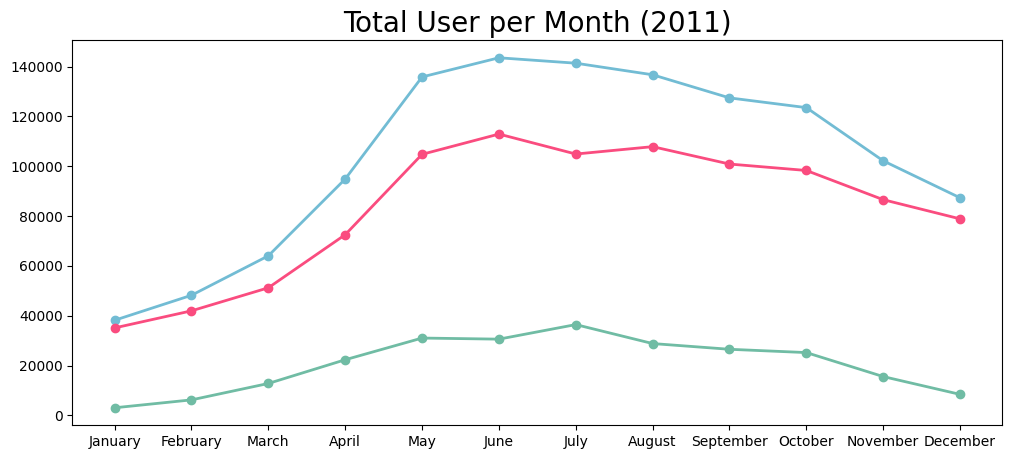

In [23]:
# Visualisasi pengguna tiap bulan di 2011
 
yearly_df_2011 = monthly_df.iloc[:12, :]



fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(
    yearly_df_2011['dteday'],
    yearly_df_2011['cnt'],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
ax.plot(
    yearly_df_2011['dteday'],
    yearly_df_2011['casual'],
    marker='o', 
    linewidth=2,
    color="#70BCA4"
)
ax.plot(
    yearly_df_2011['dteday'],
    yearly_df_2011['registered'],
    marker='o', 
    linewidth=2,
    color="#FA4C7F"
)
plt.title("Total User per Month (2011)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

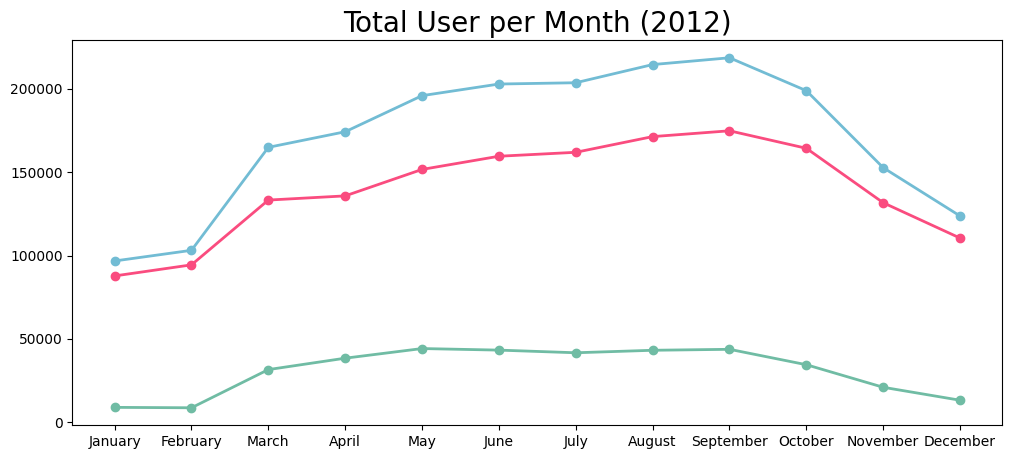

In [24]:
# Visualisasi pengguna tiap bulan di 2012
yearly_df_2012 = monthly_df.iloc[12:, :]

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(
    yearly_df_2012['dteday'],
    yearly_df_2012['cnt'],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
ax.plot(
    yearly_df_2012['dteday'],
    yearly_df_2012['casual'],
    marker='o', 
    linewidth=2,
    color="#70BCA4"
)
ax.plot(
    yearly_df_2012['dteday'],
    yearly_df_2012['registered'],
    marker='o', 
    linewidth=2,
    color="#FA4C7F"
)
plt.title("Total User per Month (2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Musim dengan pengguna terbanyak dan musim dengan pengguna paling sedikit

C:\Users\mifta\AppData\Local\Temp\ipykernel_12888\1365941229.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="season", data=seasonal.sort_values(by="cnt", ascending=False), palette=colors, ax=ax[0])
C:\Users\mifta\AppData\Local\Temp\ipykernel_12888\1365941229.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="season", data=seasonal.sort_values(by="cnt", ascending=True), palette=colors, ax=ax[1])


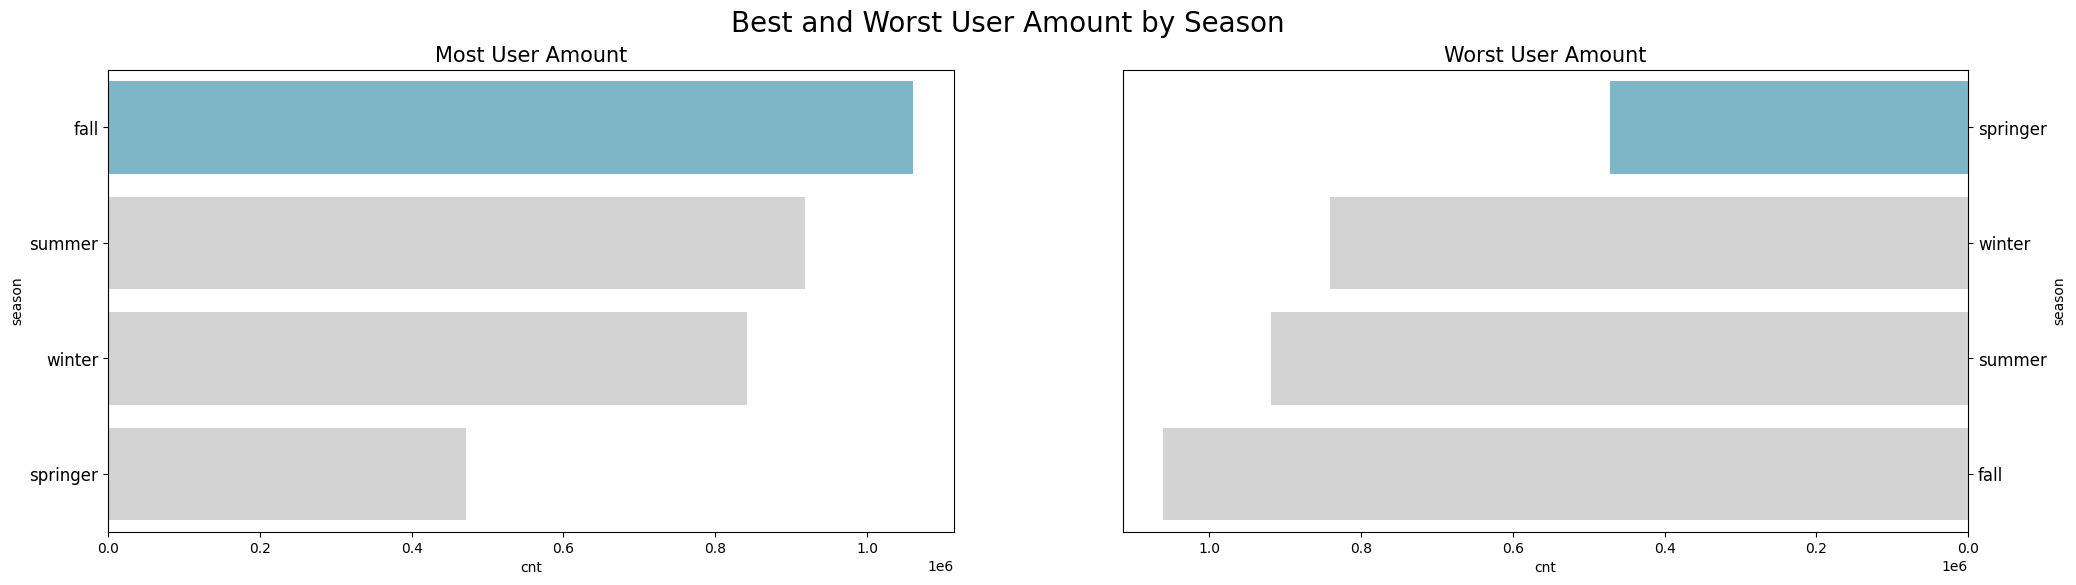

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
seasonal = days_df.groupby(by="season").agg({
    'cnt' : 'sum'
})

# Menginterpretasikan indeks
seasonal.index = seasonal.index.to_series().map({1:'springer', 2:'summer', 3:'fall', 4:'winter'})

sns.barplot(x="cnt", y="season", data=seasonal.sort_values(by="cnt", ascending=False), palette=colors, ax=ax[0])

ax[0].set_title("Most User Amount", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="cnt", y="season", data=seasonal.sort_values(by="cnt", ascending=True), palette=colors, ax=ax[1])

ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst User Amount", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst User Amount by Season", fontsize=20)
plt.show()

Berdasarkan figure di atas, Anda dapat melihat bahwa musim fall merupakan musim dengan pengguna terbanyak. Kontras dengan hal tersebut, musim springer merupakan musim dengan pengguna yang paling sedikit.  

Waktu dengan pengguna terbanyak dan waktu dengan pengguna paling sedikit

C:\Users\mifta\AppData\Local\Temp\ipykernel_12888\2073342236.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="hr", data=hourly.sort_values(by="cnt", ascending=False).head(4), palette=colors, ax=ax[0])
C:\Users\mifta\AppData\Local\Temp\ipykernel_12888\2073342236.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="hr", data=hourly.sort_values(by="cnt", ascending=True).head(4), palette=colors, ax=ax[1])


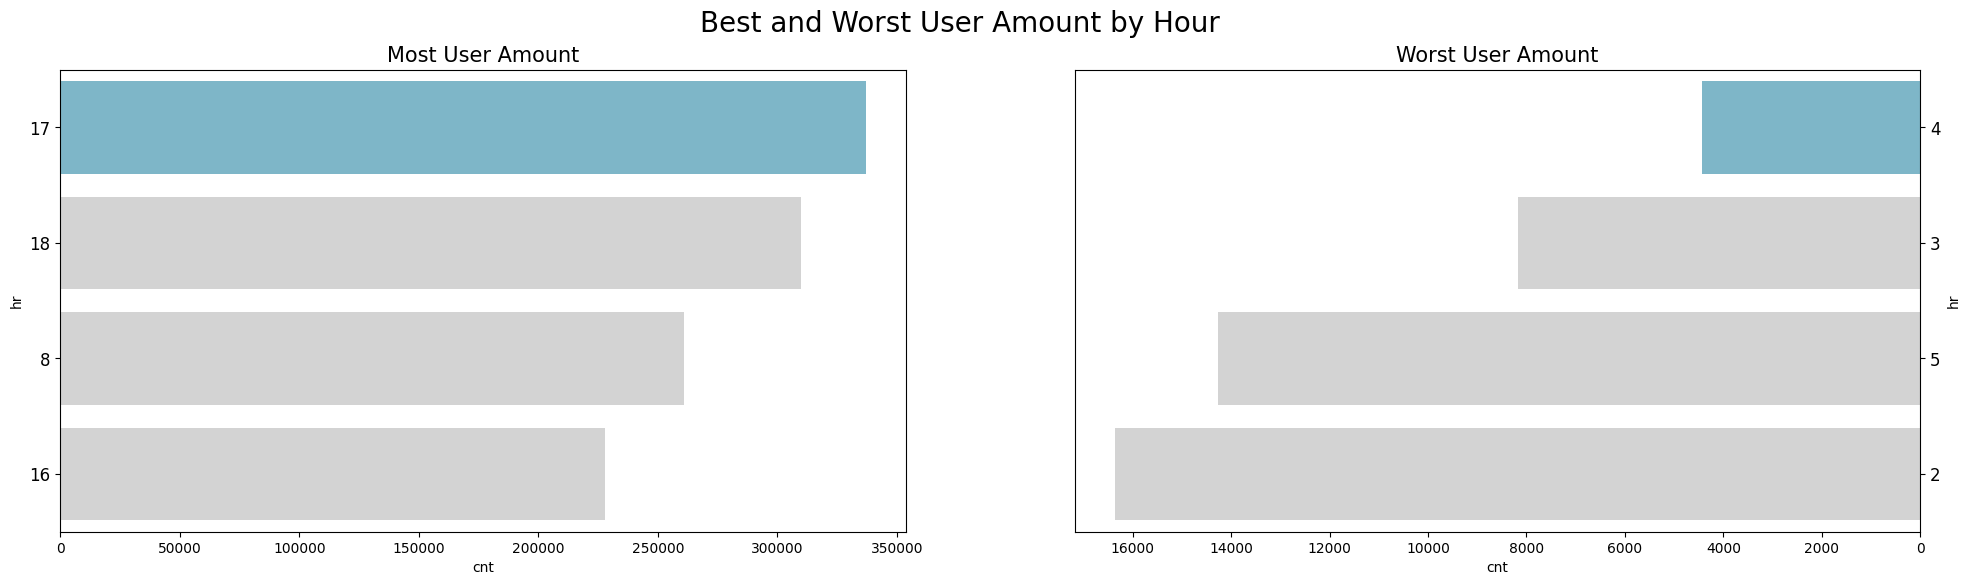

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
hourly = hours_df.groupby(by="hr").agg({
    'cnt' : 'sum'
})

# Menginterpretasikan indeks
dict_index = {}
for i in range(23):
    dict_index[i] = f"{i}"
hourly.index = hourly.index.to_series().map(dict_index)

sns.barplot(x="cnt", y="hr", data=hourly.sort_values(by="cnt", ascending=False).head(4), palette=colors, ax=ax[0])

ax[0].set_title("Most User Amount", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="cnt", y="hr", data=hourly.sort_values(by="cnt", ascending=True).head(4), palette=colors, ax=ax[1])

ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst User Amount", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst User Amount by Hour", fontsize=20)
plt.show()

Berdasarkan figure di atas, Anda dapat melihat bahwa pukul 17 merupakan waktu dengan pengguna terbanyak. Kontras dengan hal tersebut, pukul 4 merupakan waktu degan pengguna yang paling sedikit.

Cuaca dengan pengguna terbanyak dan cuaca dengan pengguna paling sedikit

C:\Users\mifta\AppData\Local\Temp\ipykernel_12888\2048931217.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="weathersit", data=weatherly.sort_values(by="cnt", ascending=False), palette=colors, ax=ax[0])
C:\Users\mifta\AppData\Local\Temp\ipykernel_12888\2048931217.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="weathersit", data=weatherly.sort_values(by="cnt", ascending=True), palette=colors, ax=ax[1])


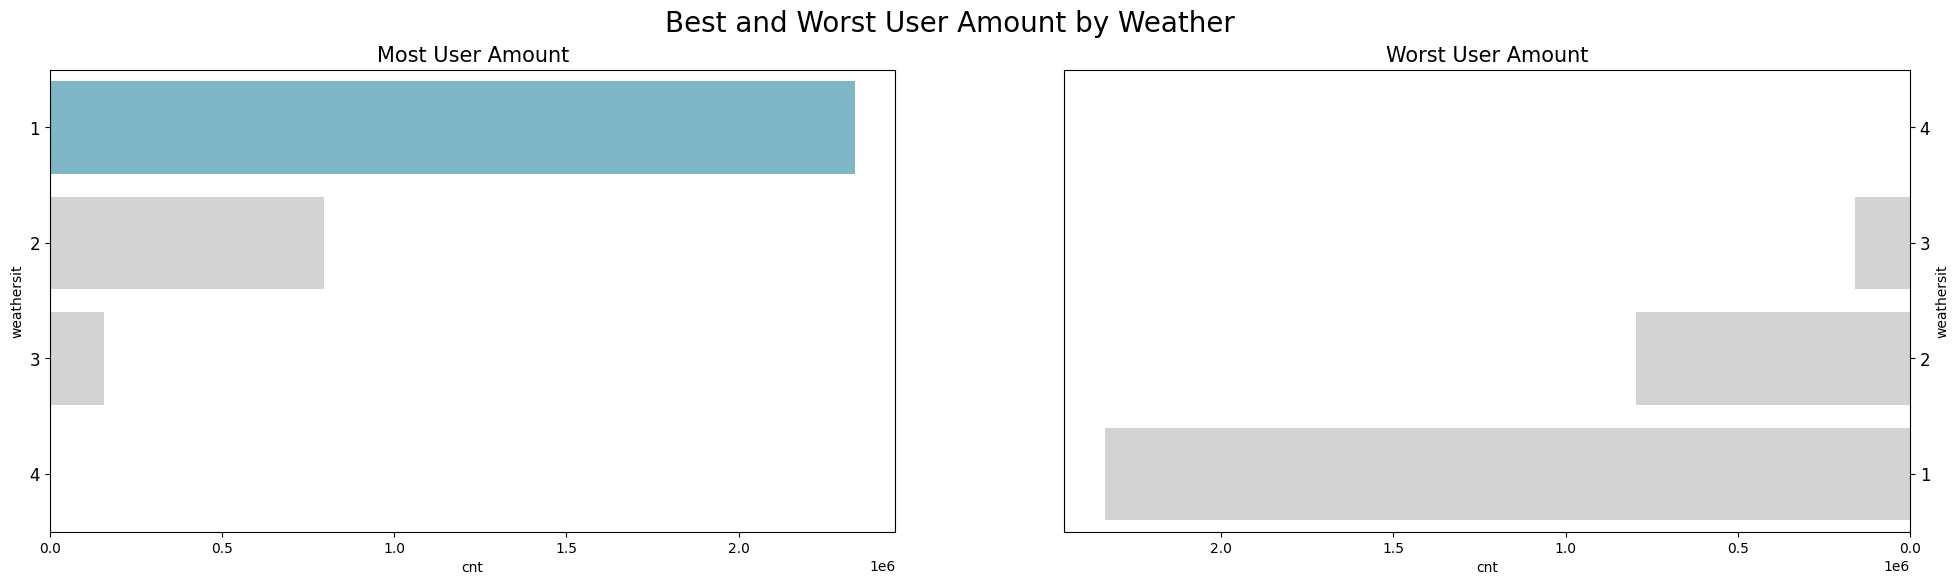

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
weatherly = hours_df.groupby(by="weathersit").agg({
    'cnt' : 'sum'
})

# Menginterpretasikan indeks
weatherly.index = weatherly.index.to_series().map({1: '1', 2: '2', 3: '3', 4: '4'})

sns.barplot(x="cnt", y="weathersit", data=weatherly.sort_values(by="cnt", ascending=False), palette=colors, ax=ax[0])

ax[0].set_title("Most User Amount", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="cnt", y="weathersit", data=weatherly.sort_values(by="cnt", ascending=True), palette=colors, ax=ax[1])

ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst User Amount", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst User Amount by Weather", fontsize=20)
plt.show()

Berdasarkan figure di atas, Anda dapat melihat bahwa cuaca 1 atau "Clear, Few clouds, Partly cloudy, Partly cloudy" merupakan cuaca dengan pengguna terbanyak. Kontras dengan hal tersebut, cuaca 4 atau "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" merupakan waktu degan pengguna yang paling sedikit.

In [28]:
# Mengekspor ke csv
# days_df.to_csv("dashboard/main_data.csv", index=False)

# RFM Analysis
Recency: parameter yang digunakan untuk melihat tanggal terakhir yang mencapai total pengguna dengan batas tertentu 

Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering hari tertentu untuk mencapai total pengguna dengan batas tertentu

Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa banyak pengguna yang berasal dari hari tersebut

In [29]:
# name_daily = days_df.groupby(by='dteday').agg({'cnt':'sum'})
# # dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
# name_daily['weekdays'] = name_daily.index.to_series().dt.day_name()
# name_daily.groupby(by='weekdays').sum()


5. Kapan 5 tanggal terakhir dengan total pengguna mencapai lebih dari 5000 dalam sehari?
6. Seberapa sering hari tertentu dapat mencapai lebih dari 5000 pengguna dalam sehari?
7. Berapa total pengguna pada hari tertentu?

In [37]:
# Recency
recency_df = days_df[(days_df['casual']>=5000)].sort_values(by='dteday', ascending=False)
# print(recency_df)

fm_df = days_df.groupby(by='dteday').agg({'cnt':'sum'})
fm_df['weekdays'] = fm_df.index.to_series().dt.day_name()

# Frequency
frequency_df = fm_df[fm_df['cnt']>=5000].groupby(by='weekdays').agg({'weekdays':'count'})
frequency_df.columns = ['frequency']
# print(frequency_df)
# Monetary
monetary_df = fm_df.groupby(by='weekdays').agg({'cnt':'sum'})

C:\Users\mifta\AppData\Local\Temp\ipykernel_12888\2605281346.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="cnt", x="dteday", data=recency_df.head(5), palette=colors, ax=ax[0])
C:\Users\mifta\AppData\Local\Temp\ipykernel_12888\2605281346.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="weekdays", data=frequency_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\mifta\AppData\Local\Temp\ipykernel_12888\2605281346.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="cnt"

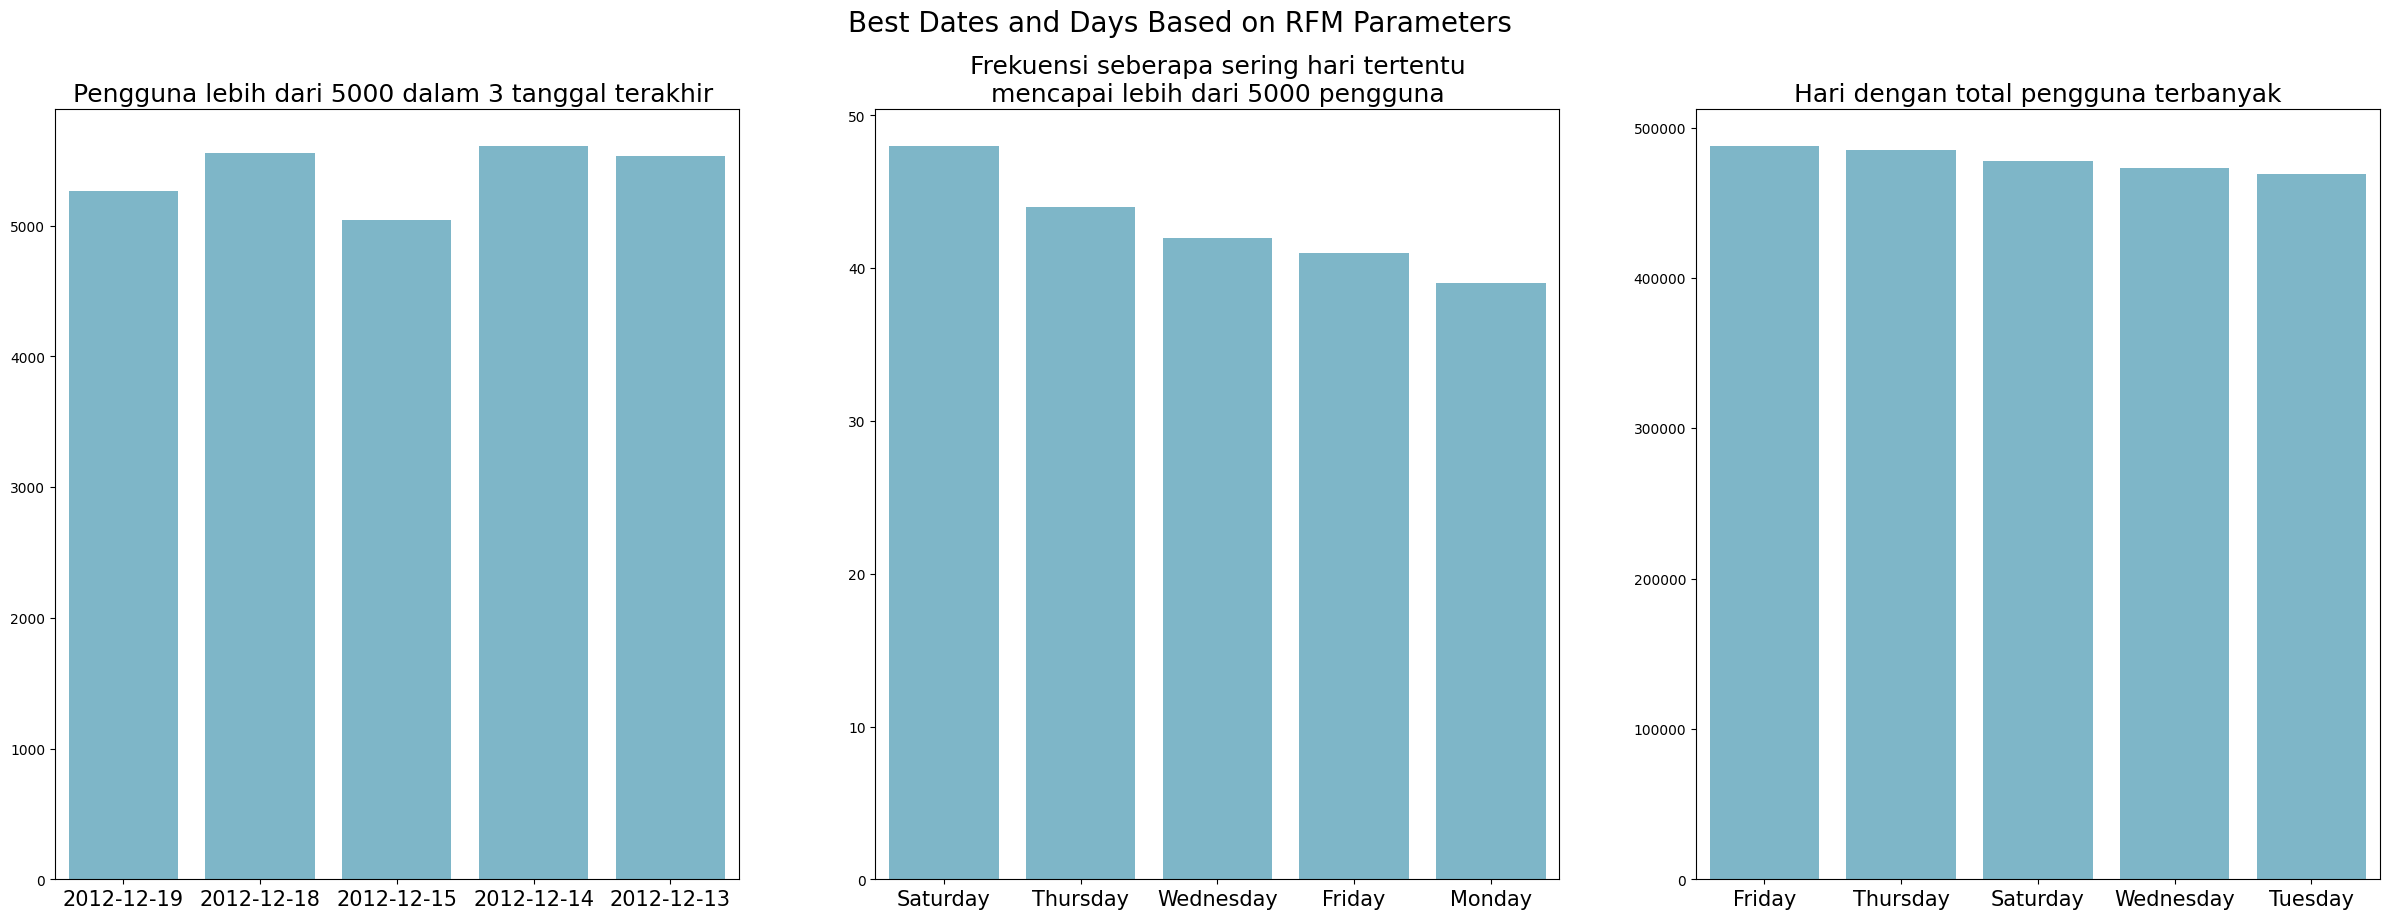

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="cnt", x="dteday", data=recency_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Pengguna lebih dari 5000 dalam 3 tanggal terakhir ", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="weekdays", data=frequency_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Frekuensi seberapa sering hari tertentu\nmencapai lebih dari 5000 pengguna", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="cnt", x="weekdays", data=monetary_df.sort_values(by="cnt", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Hari dengan total pengguna terbanyak", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Dates and Days Based on RFM Parameters", fontsize=20)
plt.show()

Pertanyaan 5, 6 , dan 7 terjawab dengan ilustrasi di atas 